<a href="https://colab.research.google.com/github/byrneap23/FinalProject/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Our coding project is an extension of a simple monte carlo problem that says this:
"The chances of rolling double sixes using 2 standard 6 sided die is a 1/36 chance, or 2.77%. However, if you roll these 2 dice 24 times, the chances of rolling
double sixes goes up to 49.1%. A monte carlo simulation can help approximate this and multiple changes can be made to the game including the number of sides
on the die and the number of rolls in one trial."
'''

In [2]:

'''
In this dice game, a player will be given a percentage that they must get within 1% of. The first numbers they will input will be the numbers that they
want each die to display to be given a 'win' for that trial (easiest choices are doubles of a specific number). There will be 100 total trials run in the simulation.

With the 'game code', the user's first attempt will have them input how many sides will be on each die (ex: standard 6 sided die, d20) with a
number corresponding to each side starting with 1 (1-6 for a standard die, 1-20 for a d20). After inputting the number of sides on the die, the player will input how many rolls
they would like to happen. This is the number of rolls in 1 of the monte carlo trials (i.e. 10 rolls is a total of rolling 2 dice 1000 times).

It will then output the probability that this scenario will happen as seen in the example problem above. The probability will be a ratio of the number
of trials where the two values were rolled out of the total number of trials (that being 100). Over time, the user will be able to change either the number of sides
on the dice or the number of rolls in one trial to get their probability closer to the target (they can technically change both, but we don't recommend that due to the volatility
it creates with their probailities).
'''


"\nIn this dice game, a player will be given a percentage that they must get within 1% of. The first numbers they will input will be the numbers that they\nwant each die to display to be given a 'win' for that trial (easiest choices are doubles of a specific number). There will be 100 total trials run in the simulation.\n\nWith the 'game code', the user's first attempt will have them input how many sides will be on each die (ex: standard 6 sided die, d20) with a\nnumber corresponding to each side starting with 1 (1-6 for a standard die, 1-20 for a d20). After inputting the number of sides on the die, the player will input how many rolls\nthey would like to happen. This is the number of rolls in 1 of the monte carlo trials (i.e. 10 rolls is a total of rolling 2 dice 1000 times).\n\nIt will then output the probability that this scenario will happen as seen in the example problem above. The probability will be a ratio of the number\nof trials where the two values were rolled out of the to

In [3]:
# importing libaries

import random
import matplotlib.pyplot as plt

In [8]:
# The user is given the probability to achieve within 1%
int_target = random.randint(2, 100)
print(f"Your target percentage to get within 1% of is {int_target}%.")
target = int_target

# User sets fixed target dice values (cannot change later)
d1_value = int(input("Enter what die number you want on the first die (this can't be changed after entered): "))
d2_value = int(input("Enter what die number you want on the second die (this can't be changed after entered): "))

# Fixed number of Monte Carlo trials
numTrials = int(input("Enter how many trials you want the simulation to occur in multiples of 10 (Hint: less trials will make the game more difficult): "))

Your target percentage to get within 1% of is 40%.
Enter what die number you want on the first die (this can't be changed after entered): 6
Enter what die number you want on the second die (this can't be changed after entered): 6



Attempt #1
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 24
Simulated Probability: 49.20%
Theoretical Probability: 49.14%
Sorry, your probability of 49.20% is not within 3% of the target (61%).
Trying again...

Attempt #2
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 25
Simulated Probability: 51.90%
Theoretical Probability: 50.55%
Sorry, your probability of 51.90% is not within 3% of the target (61%).
Trying again...

Attempt #3
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 30
Simulated Probability: 57.70%
Theoretical Probability: 57.05%
Sorry, your probability of 57.70% is not within 3% of the target (61%).
Trying again...

Attempt #4
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 35
Simulated Prob

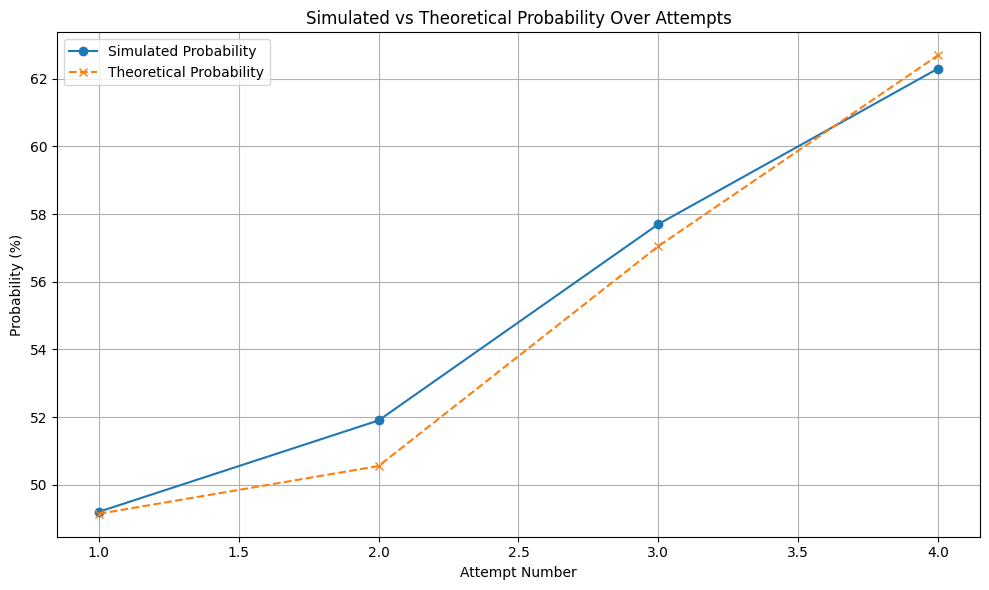

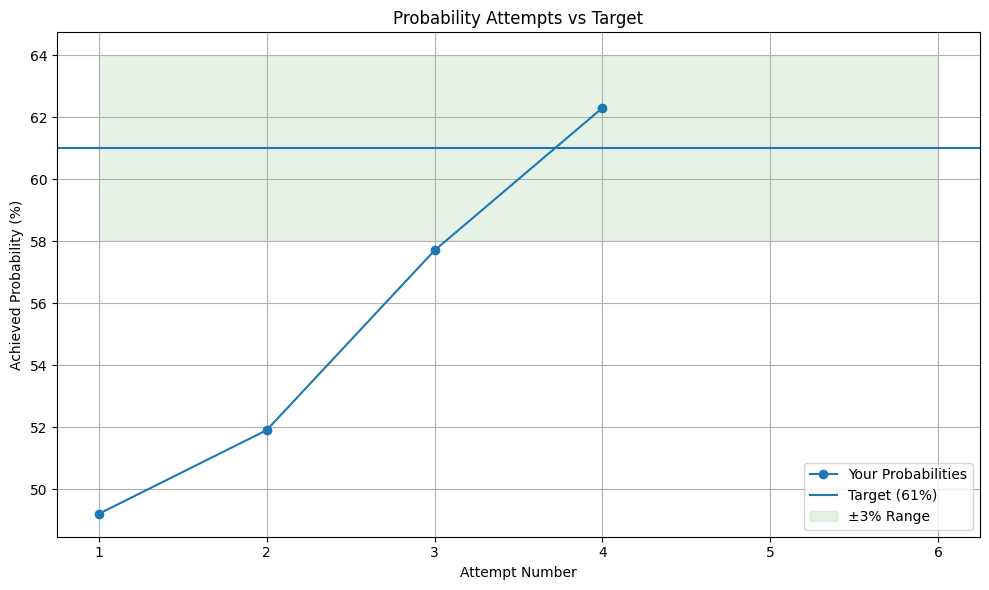

In [21]:
# Die rolling function
def rollDie(sides):
    return random.randint(1, sides)

# Simulation function: also returns trial-wise success list
def MonteProb(rolls, d1_value, d2_value, sides):
    numwins = 0.0
    wins_per_trial = []

    for i in range(numTrials):
        success = False
        for j in range(rolls):
            d1 = rollDie(sides)
            d2 = rollDie(sides)
            if d1 == d1_value and d2 == d2_value:
                numwins += 1
                success = True
                break
        wins_per_trial.append(1 if success else 0)

    prob = (numwins / numTrials) * 100
    return prob, wins_per_trial

# Function to calculate actual theoretical probability
def actual_probability(rolls, sides):
    p_match = (1 / sides) * (1 / sides)  # chance for one roll
    actual = 1 - (1 - p_match) ** rolls  # chance of at least one match
    return actual * 100
# Track attempt number, simulated and actual probabilities
attempt = 1
simulated_history = []
actual_history = []

# Loop until success
while True:
    print(f"\nAttempt #{attempt}")
    sides = int(input("Please enter the number of sides you would like on the die: "))
    rolls = int(input("Now, enter the total number of rolls you want to happen: "))

    prob, last_wins_per_trial = MonteProb(rolls, d1_value, d2_value, sides)
    actual_prob = actual_probability(rolls, sides)

    simulated_history.append(prob)
    actual_history.append(actual_prob)

    print(f"Simulated Probability: {prob:.2f}%")
    print(f"Theoretical Probability: {actual_prob:.2f}%")

    if abs(prob - target) <= 3:
        print(f"Congrats! Your probability of {prob:.2f}% is within 3% of the target ({target}%)!")
        break
    else:
        print(f"Sorry, your probability of {prob:.2f}% is not within 3% of the target ({target}%).")
        print("Trying again...")
        attempt += 1

# Line Graph: Simulated vs Actual Probability
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), simulated_history, marker='o', label="Simulated Probability")
plt.plot(range(1, attempt + 1), actual_history, marker='x', linestyle='--', label="Theoretical Probability")
plt.title("Simulated vs Theoretical Probability Over Attempts")
plt.xlabel("Attempt Number")
plt.ylabel("Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting after success
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), simulated_history, marker='o', label="Your Probabilities")
plt.axhline(y=target, linestyle='-', label=f"Target ({target}%)")
plt.fill_between(range(1, attempt + 3), target - 3, target + 3, color='green', alpha=0.1, label="±3% Range")

plt.title("Probability Attempts vs Target")
plt.xlabel("Attempt Number")
plt.ylabel("Achieved Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Now working with three die!

In [23]:
# The user is given the probability to achieve within 3%
int_target = random.randint(2, 100)
print(f"Your target percentage to get within 3% of is {int_target}%.")
target = int_target

# User sets fixed target dice values (cannot change later)
d1_value = int(input("Enter the number you want on the first die (can't be changed): "))
d2_value = int(input("Enter the number you want on the second die (can't be changed): "))
d3_value = int(input("Enter the number you want on the third die (can't be changed): "))

# Fixed number of Monte Carlo trials
numTrials = int(input("Enter how many trials you want the simulation to occur in multiples of 10 (Hint: less trials will make the game more difficult): "))

Your target percentage to get within 3% of is 49%.
Enter the number you want on the first die (can't be changed): 6
Enter the number you want on the second die (can't be changed): 6
Enter the number you want on the third die (can't be changed): 6
Enter how many trials you want the simulation to occur in multiples of 10 (Hint: less trials will make the game more difficult): 500



Attempt #1
Enter the number of sides on each die: 6
Enter the number of rolls per trial: 24
Simulated Probability: 11.20%
Theoretical Probability: 10.54%
Sorry, your probability of 11.20% is not within 3% of the target (49%).

Attempt #2
Enter the number of sides on each die: 6
Enter the number of rolls per trial: 200
Simulated Probability: 59.80%
Theoretical Probability: 60.47%
Sorry, your probability of 59.80% is not within 3% of the target (49%).

Attempt #3
Enter the number of sides on each die: 6
Enter the number of rolls per trial: 150
Simulated Probability: 51.20%
Theoretical Probability: 50.15%
Success! Your simulated probability of 51.20% is within 3% of the target (49%).


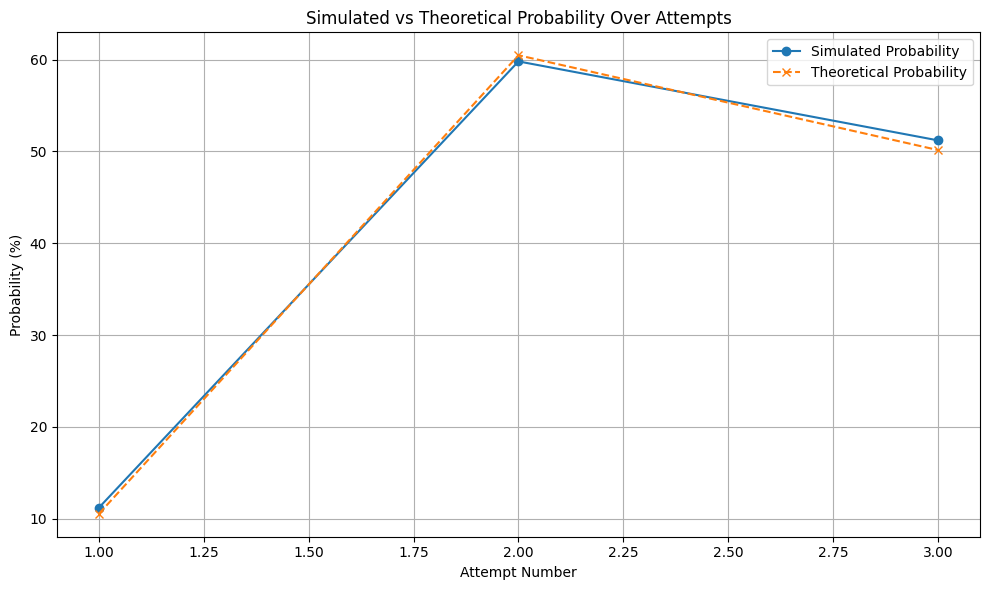

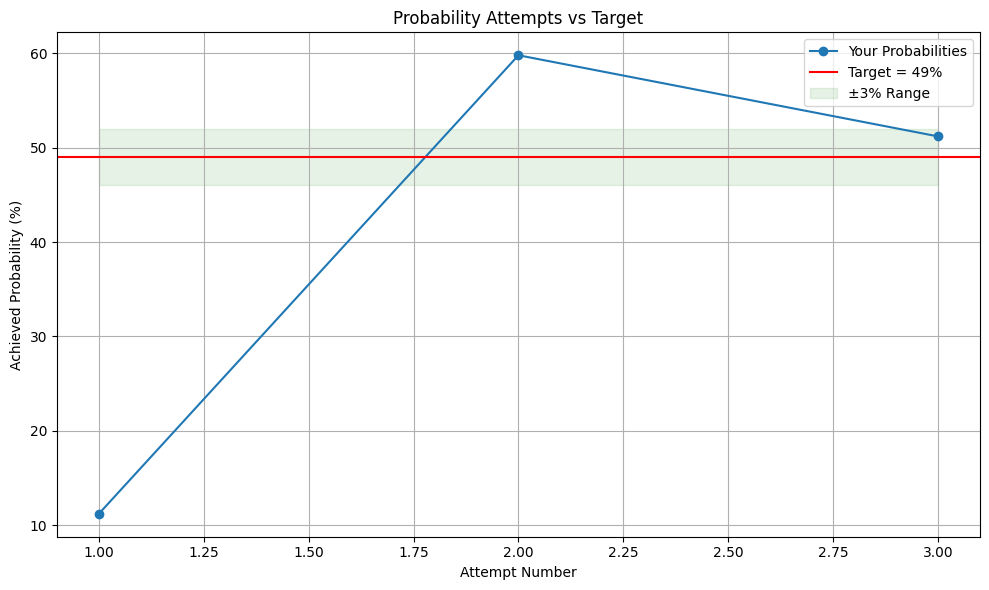

In [24]:
# Die rolling function
def rollDie(sides):
    return random.randint(1, sides)

# Simulation: match d1, d2, d3 in a single roll
def MonteProb(rolls, d1_value, d2_value, d3_value, sides):
    numwins = 0.0
    wins_per_trial = []

    for _ in range(numTrials):
        success = False
        for _ in range(rolls):
            d1 = rollDie(sides)
            d2 = rollDie(sides)
            d3 = rollDie(sides)
            if d1 == d1_value and d2 == d2_value and d3 == d3_value:
                numwins += 1
                success = True
                break
        wins_per_trial.append(1 if success else 0)

    prob = (numwins / numTrials) * 100
    return prob, wins_per_trial

# Theoretical probability for 3 fixed values
def actual_probability(rolls, sides):
    p_match = (1 / sides) ** 3  # probability all three match in one roll
    actual = 1 - (1 - p_match) ** rolls  # at least one match in rolls
    return actual * 100

# Tracking attempt data
attempt = 1
simulated_history = []
actual_history = []

# Loop until success
while True:
    print(f"\nAttempt #{attempt}")
    sides = int(input("Enter the number of sides on each die: "))
    rolls = int(input("Enter the number of rolls per trial: "))

    prob, _ = MonteProb(rolls, d1_value, d2_value, d3_value, sides)
    actual_prob = actual_probability(rolls, sides)

    simulated_history.append(prob)
    actual_history.append(actual_prob)

    print(f"Simulated Probability: {prob:.2f}%")
    print(f"Theoretical Probability: {actual_prob:.2f}%")

    if abs(prob - target) <= 3:
        print(f"Success! Your simulated probability of {prob:.2f}% is within 3% of the target ({target}%).")
        break
    else:
        print(f"Sorry, your probability of {prob:.2f}% is not within 3% of the target ({target}%).")
        attempt += 1

# Graph 1: Simulated vs Theoretical Probability
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), simulated_history, marker='o', label="Simulated Probability")
plt.plot(range(1, attempt + 1), actual_history, marker='x', linestyle='--', label="Theoretical Probability")
plt.title("Simulated vs Theoretical Probability Over Attempts")
plt.xlabel("Attempt Number")
plt.ylabel("Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 2: Attempts vs Target Range
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), simulated_history, marker='o', label="Your Probabilities")
plt.axhline(y=target, color='red', linestyle='-', label=f"Target = {target}%")
plt.fill_between(range(1, attempt + 1), target - 3, target + 3, color='green', alpha=0.1, label="±3% Range")
plt.title("Probability Attempts vs Target")
plt.xlabel("Attempt Number")
plt.ylabel("Achieved Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

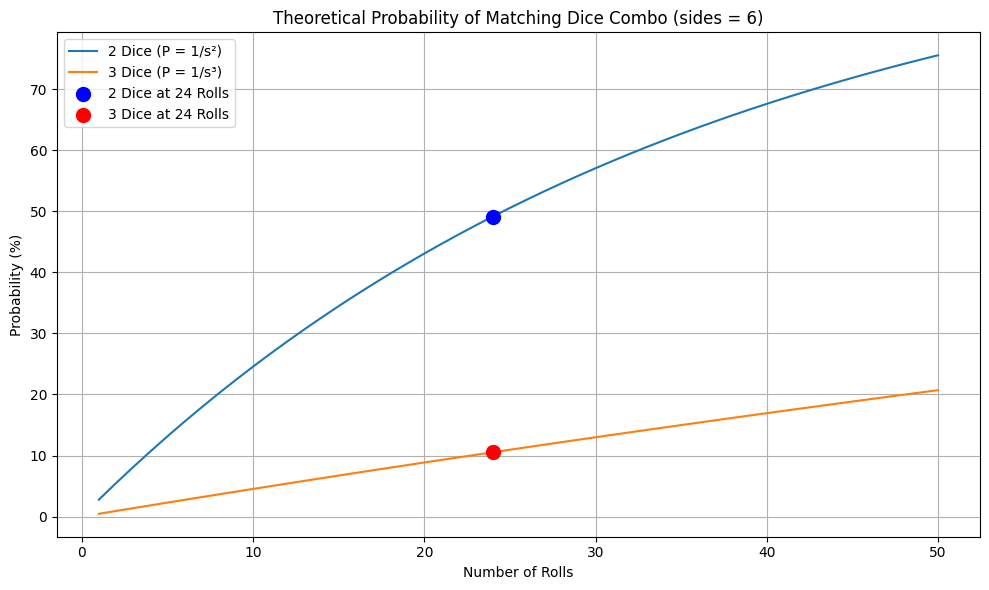

In [32]:
def theoretical_prob(num_dice, rolls, sides):
    """Calculate the probability of matching a fixed combination for num_dice."""
    p_single = (1 / sides) ** num_dice
    return [100 * (1 - (1 - p_single) ** r) for r in rolls]

# Parameters
sides = 6
max_rolls = 50
highlight_roll = 24
rolls_range = list(range(1, max_rolls + 1))

# Compute theoretical probabilities
prob_2dice = theoretical_prob(2, rolls_range, sides)
prob_3dice = theoretical_prob(3, rolls_range, sides)

# Getting Values at Roll 24
prob_2_at_24 = prob_2dice[highlight_roll - 1]
prob_3_at_24 = prob_3dice[highlight_roll - 1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(rolls_range, prob_2dice, label="2 Dice (P = 1/s²)")
plt.plot(rolls_range, prob_3dice, label="3 Dice (P = 1/s³)")
plt.scatter([highlight_roll], [prob_2_at_24], color='blue', s=100, zorder=5, label="2 Dice at 24 Rolls")
plt.scatter([highlight_roll], [prob_3_at_24], color='red', s=100, zorder=5, label="3 Dice at 24 Rolls")
plt.title(f"Theoretical Probability of Matching Dice Combo (sides = {sides})")
plt.xlabel("Number of Rolls")
plt.ylabel("Probability (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()